In [145]:
 import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path

In [146]:
input_path =  Path("data/raw/housing.csv")
df = pd.read_csv(input_path)
df_temp =  df.copy()

In [147]:
print('Number of  Examples = {}'.format(df.shape[0]))
print('X Shape = {}'.format(df.shape[1]))
print('Y Shape = {}\n'.format(df.shape[0]))
print(df.columns)

Number of  Examples = 19195
X Shape = 10
Y Shape = 19195

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [148]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19195 entries, 0 to 19194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19195 non-null  float64
 1   latitude            19195 non-null  float64
 2   housing_median_age  19195 non-null  float64
 3   total_rooms         19195 non-null  float64
 4   total_bedrooms      19006 non-null  float64
 5   population          19195 non-null  float64
 6   households          19195 non-null  float64
 7   median_income       19195 non-null  float64
 8   median_house_value  19195 non-null  float64
 9   ocean_proximity     19195 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB
None


In [149]:
df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
670,-122.12,37.68,35.0,1958.0,484.0,1146.0,448.0,2.9500,148900.0,NEAR BAY
3629,-118.51,34.20,35.0,1614.0,308.0,850.0,330.0,4.1806,209000.0,<1H OCEAN
11705,-121.49,38.51,18.0,700.0,169.0,260.0,128.0,2.9219,152900.0,INLAND


In [150]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [151]:
for col in df.columns.tolist():
    print('({}) column missing values: {}'.format(col, df[col].isnull().sum()))
print('\n')

(longitude) column missing values: 0
(latitude) column missing values: 0
(housing_median_age) column missing values: 0
(total_rooms) column missing values: 0
(total_bedrooms) column missing values: 189
(population) column missing values: 0
(households) column missing values: 0
(median_income) column missing values: 0
(median_house_value) column missing values: 0
(ocean_proximity) column missing values: 0




['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
ISLAND have 2 values


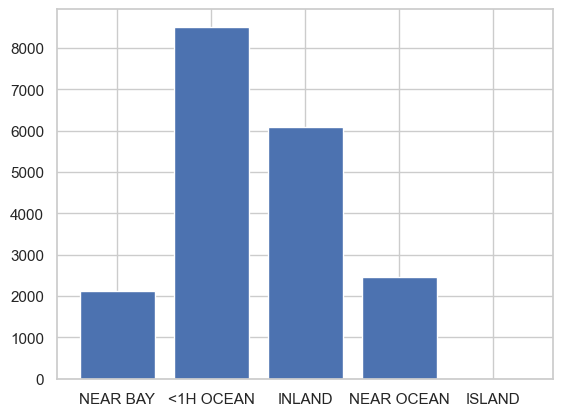

In [152]:
oceanProximity = df['ocean_proximity'].unique()
print(oceanProximity)

values = []
for level in oceanProximity:
    values.append(df['ocean_proximity'].loc[df['ocean_proximity'] == level].count())
plt.bar(oceanProximity, values)
print('ISLAND have {} values'.format( values[-1]))

In [153]:
df.ocean_proximity = df.ocean_proximity.map( {'NEAR BAY':1, '<1H OCEAN':2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5} )

oceanProximity = df['ocean_proximity'].unique()
print(oceanProximity)

[1 2 3 4 5]


In [154]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'total_bedrooms']

,Feature 1,Feature 2,Correlation Coefficient
6,total_bedrooms,total_bedrooms,1.000000
10,total_bedrooms,households,0.979298
13,total_bedrooms,total_rooms,0.930179
21,total_bedrooms,population,0.876248
29,total_bedrooms,housing_median_age,0.321010
62,total_bedrooms,longitude,0.068371
67,total_bedrooms,latitude,0.065190
72,total_bedrooms,median_house_value,0.047280
91,total_bedrooms,median_income,0.010443
96,total_bedrooms,ocean_proximity,0.006306


In [155]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
260,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,1
306,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,1
494,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,1
517,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,1
682,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,1
...,...,...,...,...,...,...,...,...,...,...
18715,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,120400.0,2
18845,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,4
18945,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,2
19024,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,2


In [156]:
df = df.sort_values(by=['households'])

In [157]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15012,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,1
2324,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,3
2905,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,3
11410,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,3
11571,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,3
...,...,...,...,...,...,...,...,...,...,...
8335,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,2
5634,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,2
9571,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,2
12203,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,3


In [158]:
df['total_bedrooms']= df['total_bedrooms'].interpolate()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15012,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,1
2324,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,3
2905,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,3
11410,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,3
11571,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,3
...,...,...,...,...,...,...,...,...,...,...
8335,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,2
5634,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,2
9571,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,2
12203,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,3


In [159]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [160]:
df = df.sort_index(ascending=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
19190,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
19191,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
19192,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
19193,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


In [161]:
df_corr_MHV = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr_MHV.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr_MHV[df_corr_MHV['Feature 1'] == 'median_house_value']

,Feature 1,Feature 2,Correlation Coefficient
2,median_house_value,median_house_value,1.000000
25,median_house_value,median_income,0.688830
34,median_house_value,ocean_proximity,0.211681
42,median_house_value,latitude,0.144646
45,median_house_value,total_rooms,0.132531
54,median_house_value,housing_median_age,0.106521
69,median_house_value,households,0.063839
73,median_house_value,total_bedrooms,0.048372
75,median_house_value,longitude,0.045601
81,median_house_value,population,0.027498


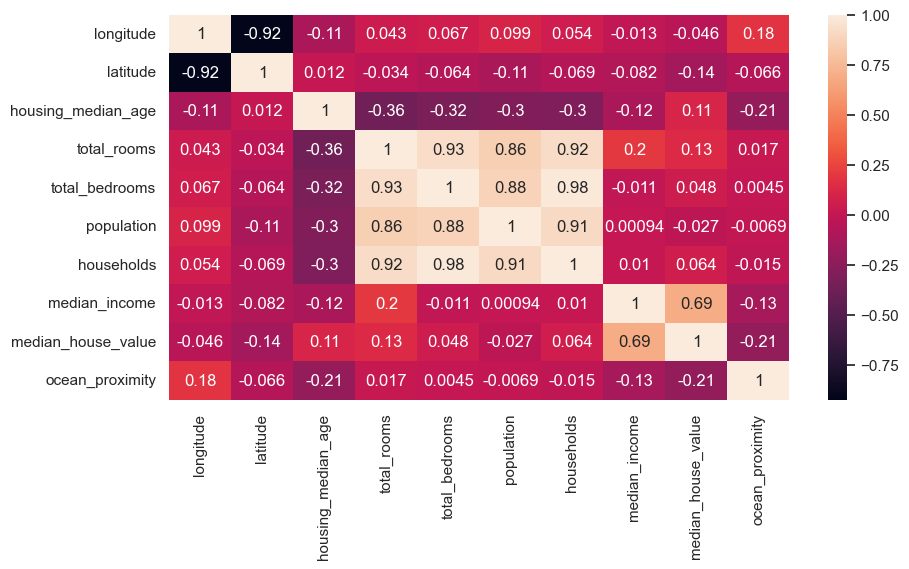

In [162]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:xlabel='ocean_proximity'>

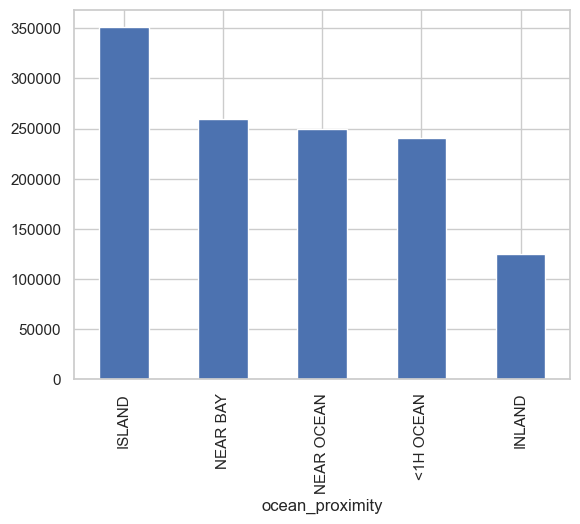

In [163]:
df.ocean_proximity = df.ocean_proximity.map( {1:'NEAR BAY', 2:'<1H OCEAN', 3:'INLAND', 4:'NEAR OCEAN', 5:'ISLAND'} )
mean_MHV_ocean = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)
mean_MHV_ocean.plot(kind='bar')